# **Heart Failure Prediction Using Machine Learning Techniques**


---

## **AIE504 – Machine Learning**

**Graduate School – Artificial Intelligence Engineering (With Thesis)**

**Student: CHAHYAANDIDA ISHAYA**

**Student ID: 253307014**

**Program Code: 3307010**

**Instructor: Assoc. Prof. Dr. Evrim Guler**

---

# **Project Title:**
---
## *Heart Failure Prediction Using Machine Learning Techniques*

---


## **1. Introduction**

Heart failure is a major global health challenge, contributing significantly to morbidity and mortality rates worldwide. Early prediction and detection allow clinicians to initiate timely intervention, reduce complications, and improve patient outcomes.

Machine learning provides advanced computational techniques capable of analyzing large and complex clinical datasets to uncover hidden patterns associated with heart failure. By leveraging these techniques, it becomes possible to build reliable models that assist clinicians in making data-driven decisions.

This project focuses on developing a machine learning–based prediction system that identifies individuals at risk of heart failure using structured medical data.

---



## **2. Purpose of the Project**

The purpose of this project is to design, implement, and evaluate a machine learning model that predicts heart failure risk based on relevant clinical and demographic features.

The project aims to:

* Create an intelligent system capable of identifying high-risk heart failure patients.
* Explore the influence of medical attributes such as blood pressure, ejection fraction, cholesterol level, age, and serum creatinine.
* Compare the performance of multiple machine learning algorithms.
* Demonstrate the practical role of machine learning in improving cardiovascular disease diagnosis and management.

Ultimately, the system provides a foundation for clinical decision support tools that aid in early diagnosis and preventive care.

---

## **3. Dataset Description**

The project will utilize a publicly available **Heart Failure Clinical Records Dataset**, typically sourced from **Kaggle**.
https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction/data


### *This dataset have 11 clinical features for predicting heart disease events:*

---
### **i. Age**

* The age of the patient in **years**.
* Heart disease risk generally increases with age.

### **ii. Sex**

* The biological sex of the patient.
* **M = Male**, **F = Female**
* Males often have a higher risk of heart disease at younger ages.

### **iii. ChestPainType**

Indicates the type of chest pain experienced by the patient:

* **TA (Typical Angina):** Chest pain related to decreased blood supply to the heart.
* **ATA (Atypical Angina):** Chest pain not typical of angina.
* **NAP (Non-Anginal Pain):** Chest pain not related to the heart.
* **ASY (Asymptomatic):** No chest pain; heart disease may be silent.

### **iv. RestingBP**

* Resting Blood Pressure in **mm Hg** (millimeters of mercury).
* Normal is around **120/80 mm Hg**; higher levels may indicate hypertension.

### **v. Cholesterol**

* Serum cholesterol in **mg/dl**.
* High cholesterol is a major risk factor for heart disease.

### **vi. FastingBS**

Fasting Blood Sugar:

* **1** = Fasting blood sugar > **120 mg/dl**
* **0** = Otherwise
* Higher values may indicate diabetes or pre-diabetes, increasing heart risk.

### **vii. RestingECG**

Results of the resting electrocardiogram test:

* **Normal:** No abnormalities.
* **ST:** Abnormalities in the ST-T wave (related to heart muscle stress or damage).
* **LVH:** Signs of **left ventricular hypertrophy**, meaning the heart’s left chamber is enlarged due to high pressure.

### **viii. MaxHR**

* Maximum heart rate achieved during exercise.
* Typically between **60 and 202** beats per minute.
* Lower values may indicate poor heart fitness.

### **ix. ExerciseAngina**

Whether exercise causes chest pain (angina):

* **Y = Yes**
* **N = No**
* Chest pain during exercise is a strong indicator of heart problems.

### **x. Oldpeak**

* A measure of **ST depression** induced by exercise relative to rest.
* Higher values indicate greater stress-induced abnormalities.

### **xi. ST_Slope**

The slope of the ST segment during peak exercise:

* **Up:** Upsloping – usually normal.
* **Flat:** Suggests possible heart issues.
* **Down:** Downsloping – strongly correlated with heart disease.

### **HeartDisease**

The target/output variable:

* **1 = Heart disease present**
* **0 = No heart disease**
* This is what models try to predict.
These features will be used to build a classification model that predicts the likelihood of heart failure.

---

## **4. Methodology**
 *The development of the predictive system will followed a systematic machine learning workflow:*

---


### **4.1 Data Acquisition**

* Download the heart failure dataset from an approved open-source data platform.
* Import the dataset using Python libraries such as Pandas and NumPy.

#### ***Import Dataset***

---

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your dataset in Google Drive
# Replace 'your_dataset_path.csv' with the actual path to your CSV file
dataset_path = '/content/drive/MyDrive/datasets/heart.csv'

# Load the dataset
try:
    df = pd.read_csv(dataset_path)
    print("Dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{dataset_path}' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully!
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


### **4.2 Exploratory Data Analysis (EDA)**

* Produce statistical summaries of the dataset.
* Visualize relationships among clinical attributes.
* Identify correlations and potential predictors of heart failure.
* Use plots such as heatmaps, pair plots, and distribution graphs.

#### ***Description of Dataset***
---



In [ ]:
print("First 5 rows of the DataFrame:")
display(df.head())

First 5 rows of the DataFrame:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### ***Shape of the DataFrame (rows, columns)***

---

In [ ]:
print("Shape of the DataFrame (rows, columns):")
print(df.shape)

Shape of the DataFrame (rows, columns):
(918, 12)


#### ***Column Information***
---

In [ ]:
print("Column information:")
print(df.info())

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


#### **Visualize Missing Values**
***Create a heatmap to visualize any missing values in the DataFrame, confirming the data quality.***


#### **Import Visualization Libraries**
Import `matplotlib.pyplot` and `seaborn` for data visualization.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Visualization libraries matplotlib.pyplot and seaborn imported successfully.")

Visualization libraries matplotlib.pyplot and seaborn imported successfully.


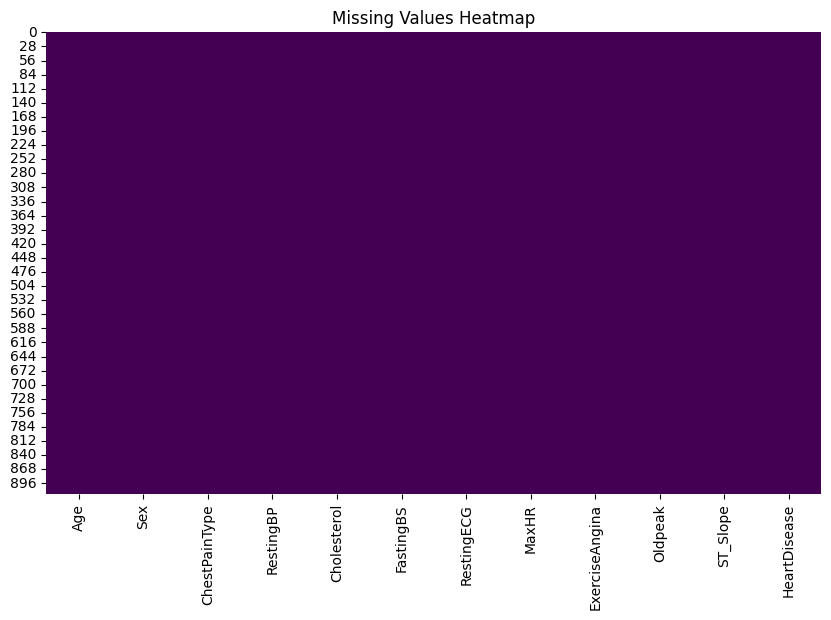

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#### ***Descriptive statistics for numerical columns***

---

In [ ]:
print("Descriptive statistics for numerical columns:")
display(df.describe())

Descriptive statistics for numerical columns:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### **Analyze Categorical Feature Distributions**

*Analyze categorical feature distributions using count plots to understand their frequency and balance.*

---

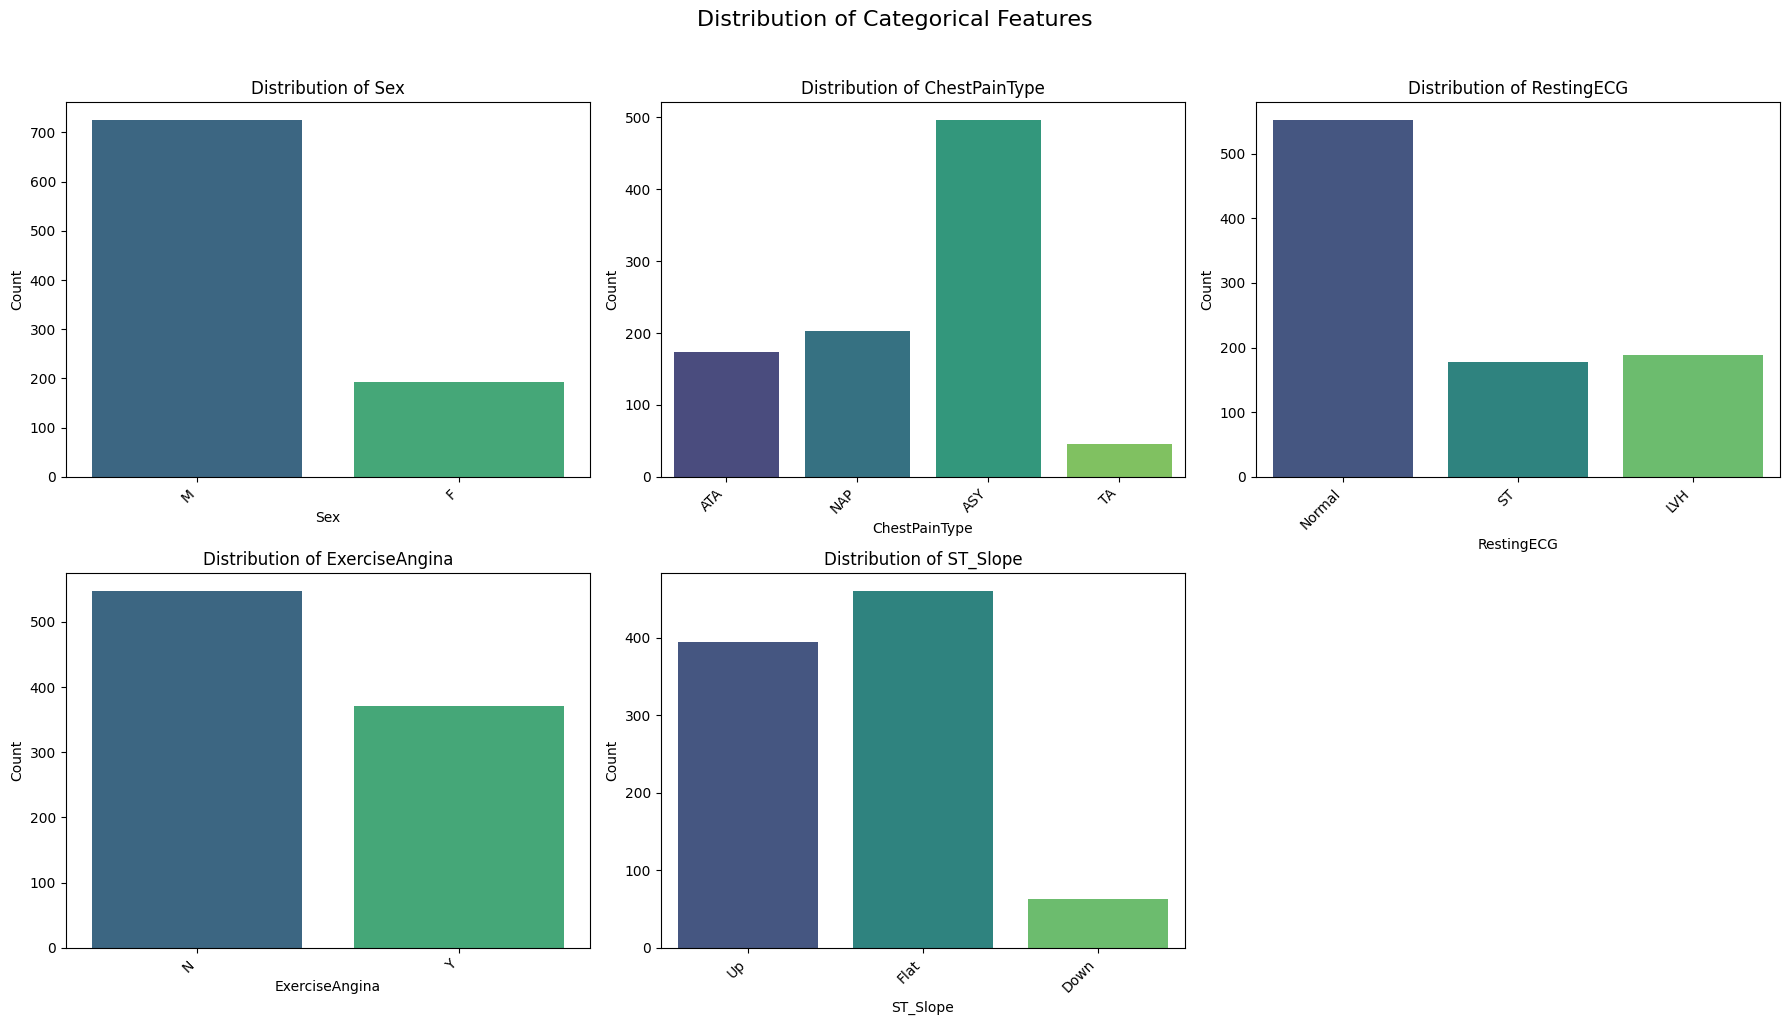

Count plots for categorical features displayed.


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Determine grid size for subplots
num_categorical_cols = len(categorical_cols)
num_rows = (num_categorical_cols + 2) // 3  # Aim for 3 columns per row
num_cols = 3

plt.figure(figsize=(num_cols * 6, num_rows * 5))
plt.suptitle('Distribution of Categorical Features', y=1.02, fontsize=16)

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=df[col], hue=df[col], palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability if many categories

plt.tight_layout()
plt.show()
print("Count plots for categorical features displayed.")

#### **Analyze Numerical Feature Distributions**

*Analyze numerical feature distributions using histograms or Kernel Density Estimate (KDE) plots to understand their spread, central tendency, and identify any outliers or skewness.*

---

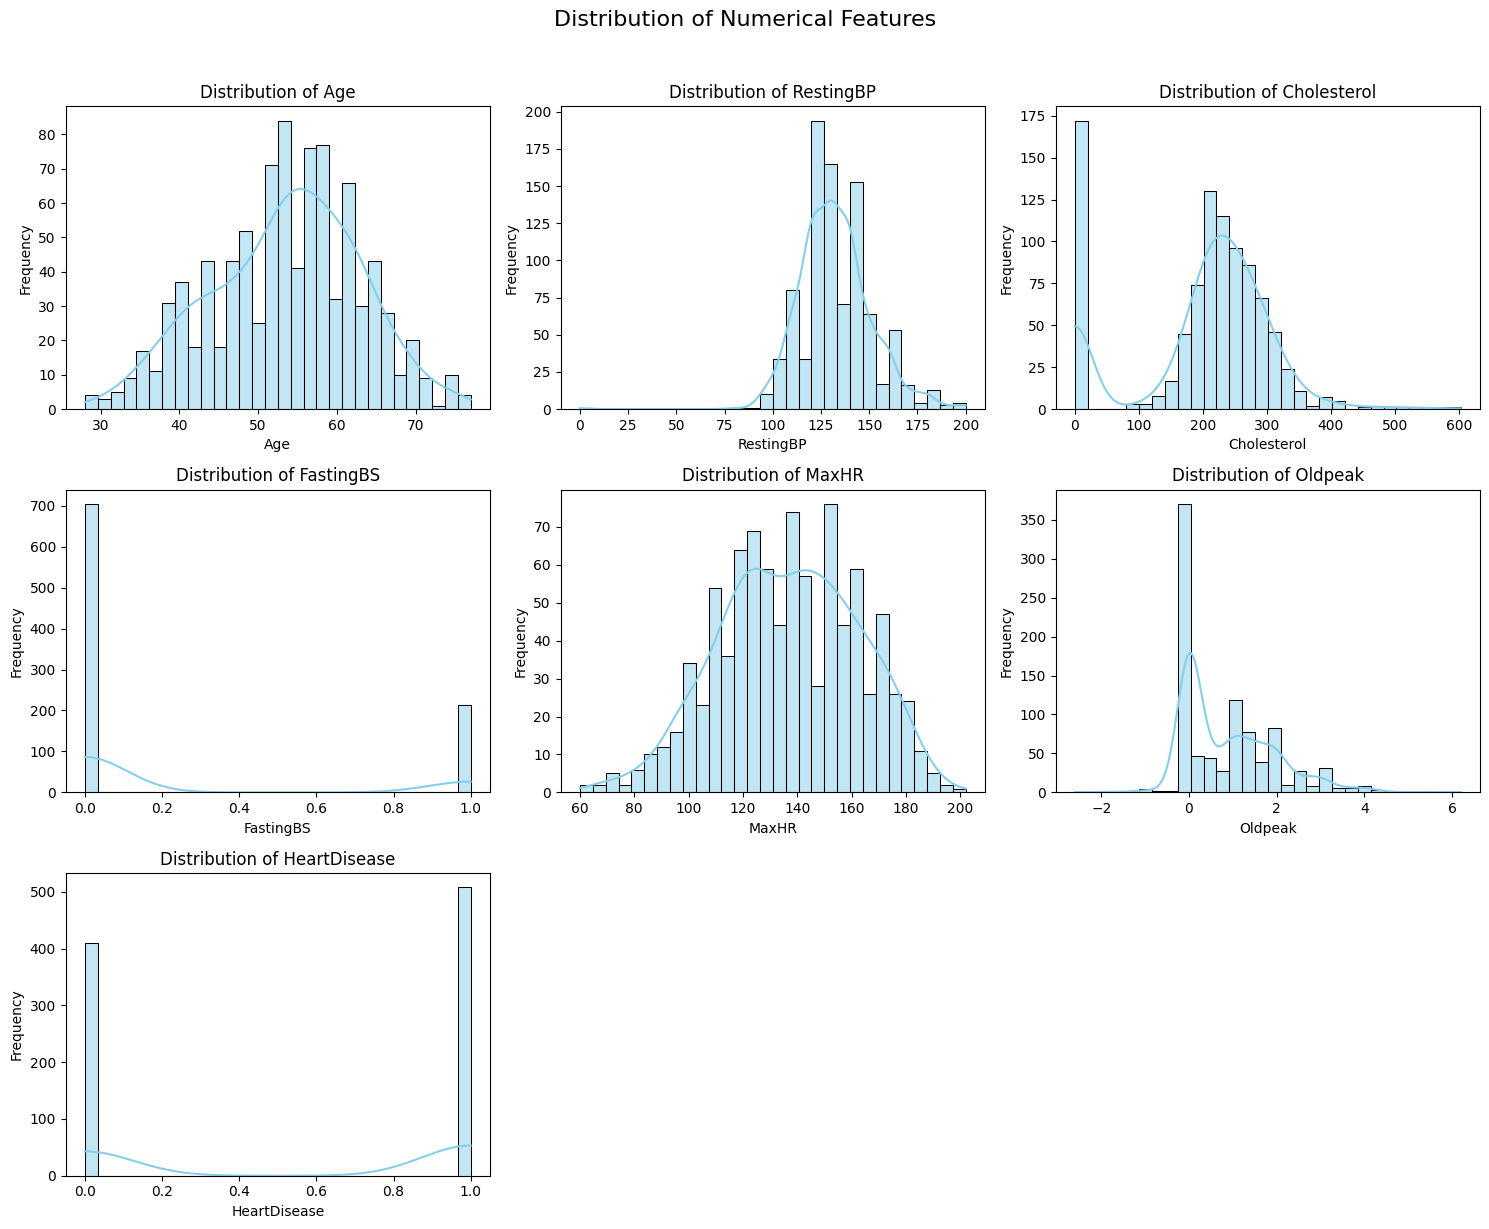

Histograms and KDE plots for numerical features displayed.


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'HeartDisease' from numerical_cols for distribution plots as it's the target variable
# and its distribution is typically handled separately or as part of bivariate analysis.
# However, for general distribution analysis of features, it can be included.
# For now, let's keep it and see its distribution as a feature.

# Determine grid size for subplots
num_numerical_cols = len(numerical_cols)
num_rows = (num_numerical_cols + 2) // 3  # Aim for 3 columns per row
num_cols = 3

plt.figure(figsize=(num_cols * 5, num_rows * 4))
plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Histograms and KDE plots for numerical features displayed.")

#### **Bivariate Analysis: Categorical Features vs. HeartDisease**

*Conduct bivariate analysis for categorical features against the 'HeartDisease' target variable using count plots or stacked bar plots to observe potential relationships.*

---

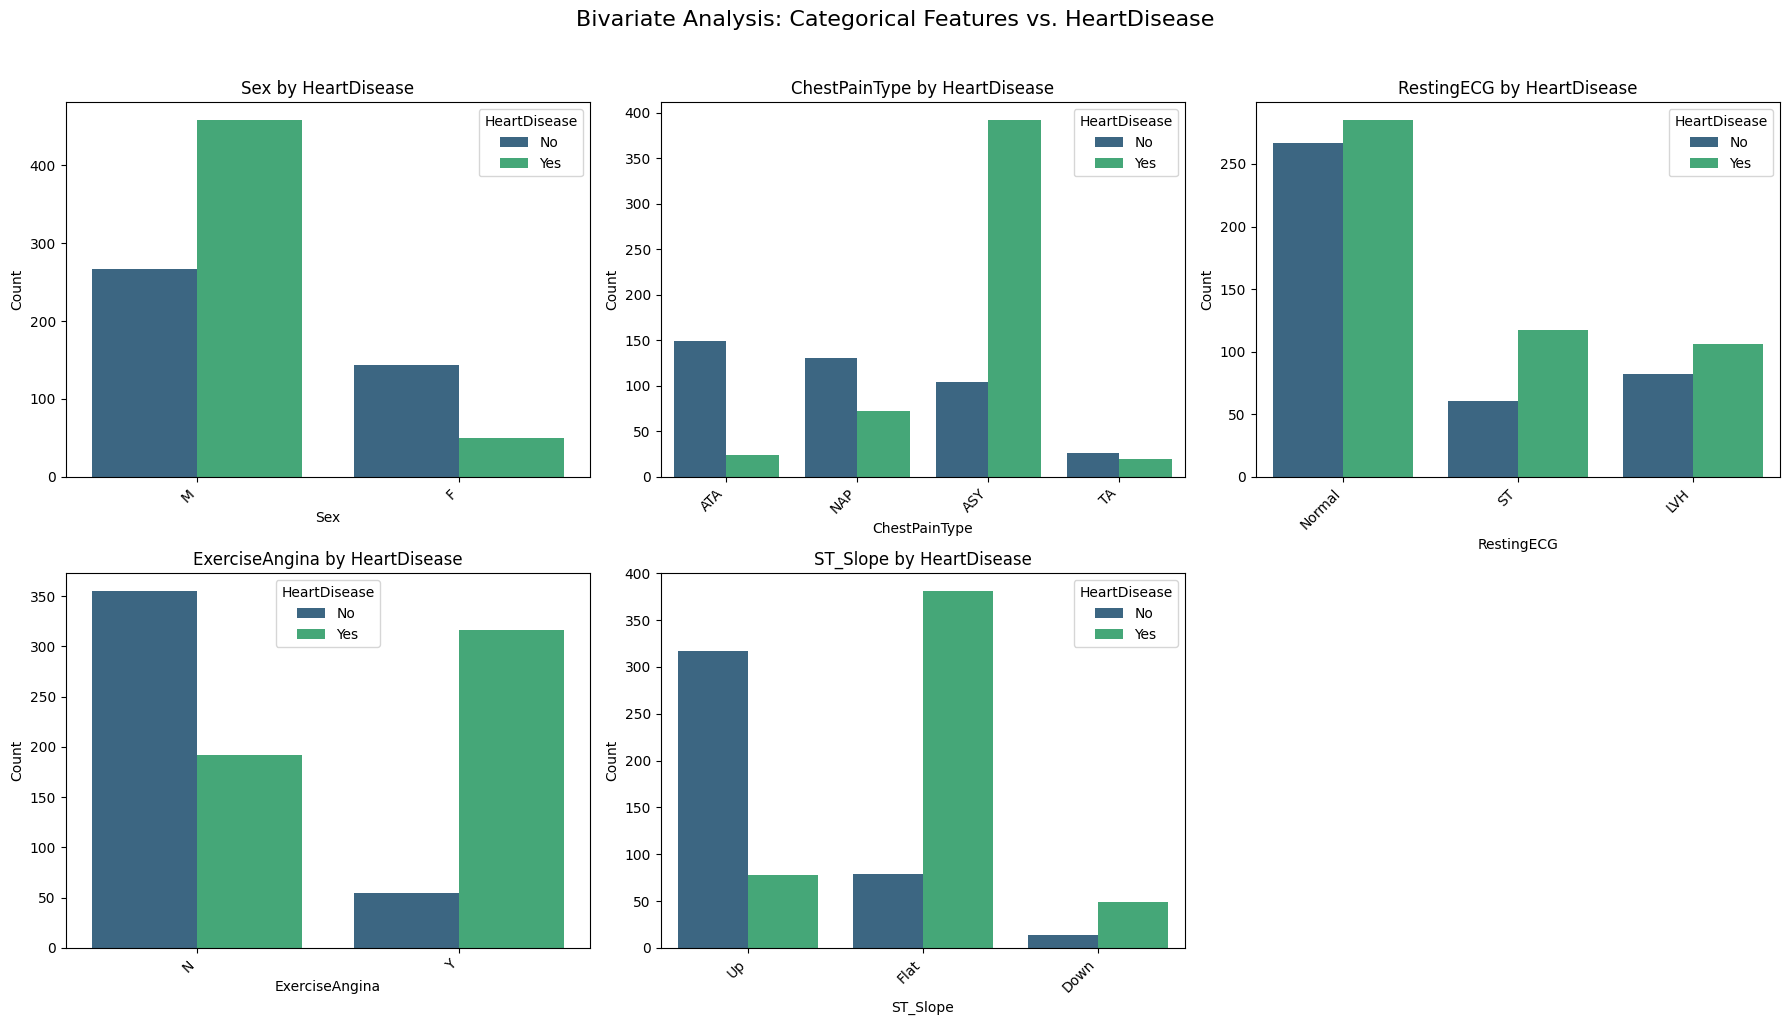

Count plots for categorical features against HeartDisease displayed.


In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns

num_features_to_plot = len(categorical_features)
num_rows = (num_features_to_plot + 2) // 3 # Aim for 3 columns per row
num_cols = 3

plt.figure(figsize=(num_cols * 6, num_rows * 5))
plt.suptitle('Bivariate Analysis: Categorical Features vs. HeartDisease', y=1.02, fontsize=16)

for i, col in enumerate(categorical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=col, hue='HeartDisease', data=df, palette='viridis')
    plt.title(f'{col} by HeartDisease')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.legend(title='HeartDisease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()
print("Count plots for categorical features against HeartDisease displayed.")

#### **Bivariate Analysis: Numerical Features vs. HeartDisease**

*Conduct bivariate analysis for numerical features against the 'HeartDisease' target variable using box plots or violin plots to observe potential relationships.*

---

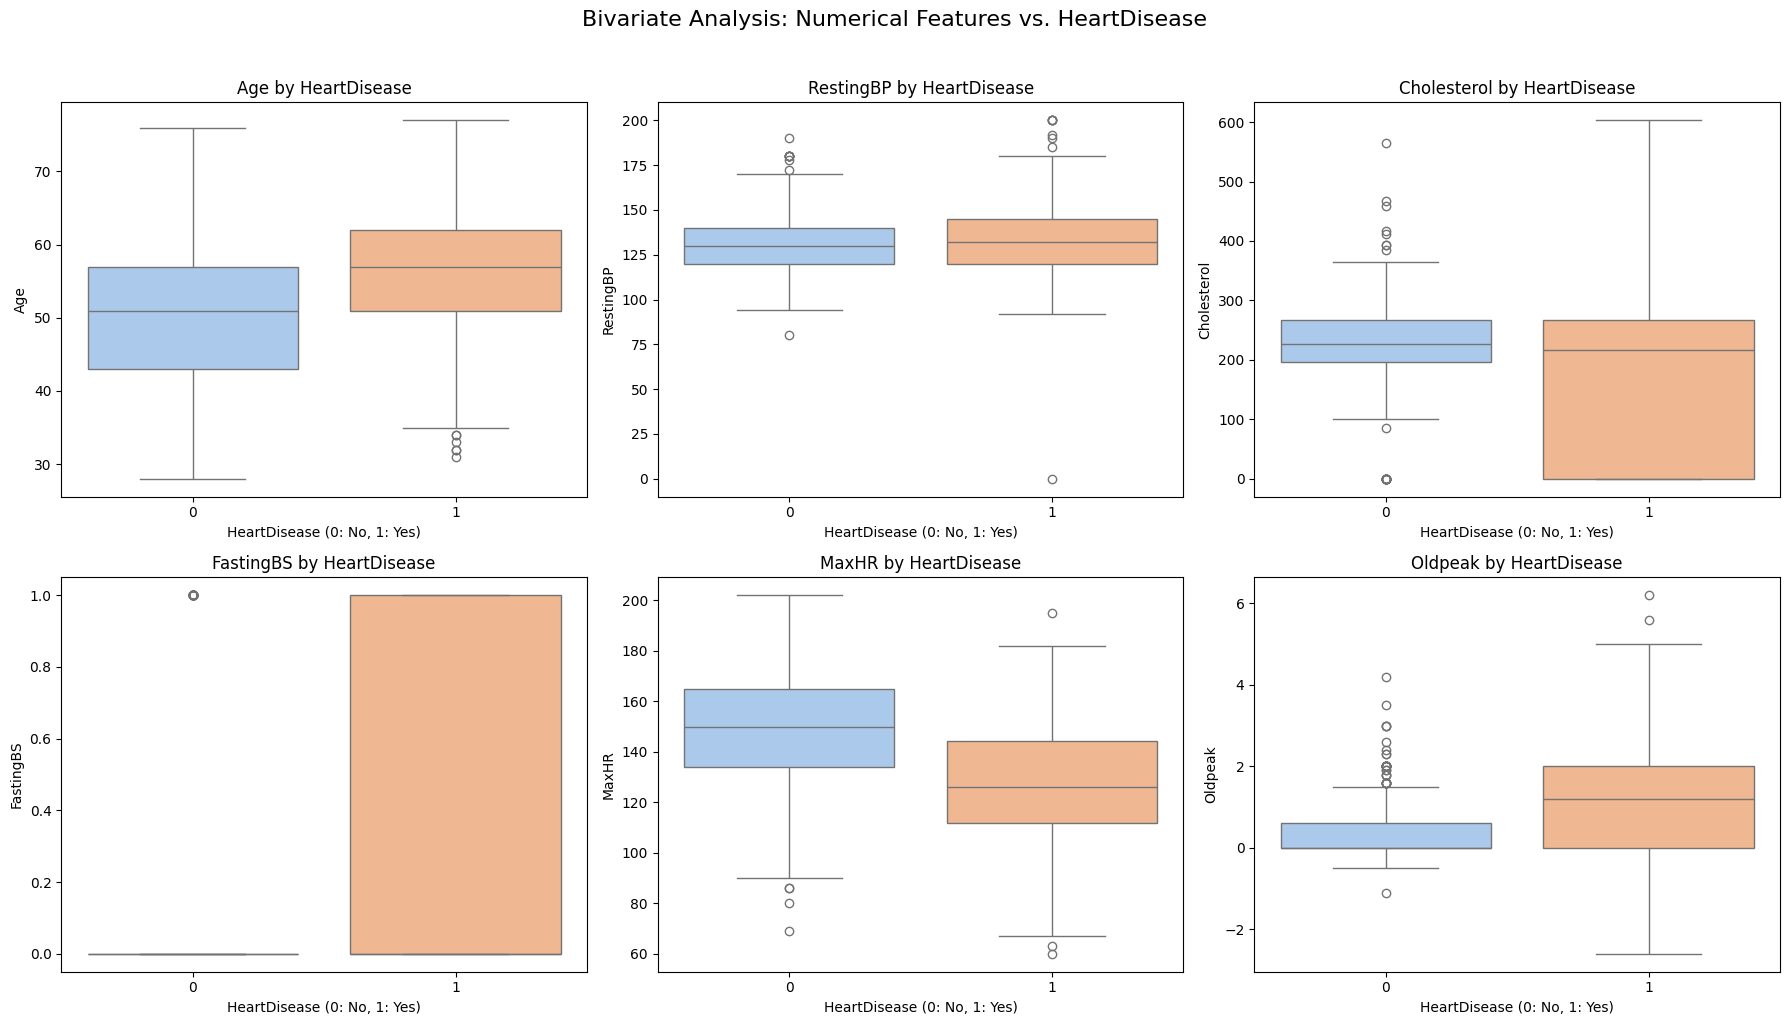

Box plots for numerical features against HeartDisease displayed.


In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('HeartDisease')

num_features_to_plot = len(numerical_features)
num_rows = (num_features_to_plot + 2) // 3 # Aim for 3 columns per row
num_cols = 3

plt.figure(figsize=(num_cols * 6, num_rows * 5))
plt.suptitle('Bivariate Analysis: Numerical Features vs. HeartDisease', y=1.02, fontsize=16)

for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='HeartDisease', y=col, data=df, hue='HeartDisease', palette='pastel', legend=False)
    plt.title(f'{col} by HeartDisease')
    plt.xlabel('HeartDisease (0: No, 1: Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
print("Box plots for numerical features against HeartDisease displayed.")

#### **Generate Correlation Heatmap for Numerical Features**

*Generate a correlation heatmap for numerical features (including 'HeartDisease') to identify relationships and multicollinearity among them.*

---

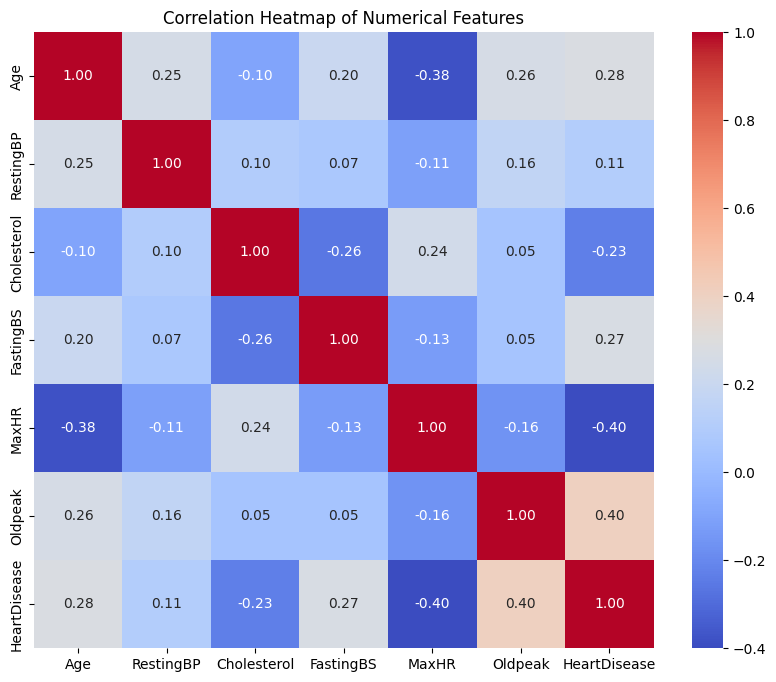

Correlation heatmap for numerical features displayed.


In [ ]:
numerical_cols_for_corr = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols_for_corr].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
print("Correlation heatmap for numerical features displayed.")

### **4.3 Data Preprocessing**

* Check for missing or inconsistent values.
* Encode categorical features (if any).
* Apply normalization or scaling to continuous variables.
* Split the dataset into training and testing subsets.

#### **Separate features and target**

*Divide the DataFrame into features (X) and the target variable (y), which is 'HeartDisease'.*

---

In [ ]:
#  To separate features and the target variable, I will create a new DataFrame
#  `X` by dropping the 'HeartDisease' column from `df` and
#  a Series `y` containing only the 'HeartDisease' column.


X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 values of y:")
display(y.head())

Features (X) shape: (918, 11)
Target (y) shape: (918,)

First 5 rows of X:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up



First 5 values of y:


,HeartDisease
0,0
1,1
2,0
3,1
4,0


#### **Identify categorical and numerical columns**

*Automatically detect columns with 'object' dtype as categorical and the remaining as numerical (excluding the target).*


In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


#### **Data Encording**

#### *Apply one-hot encoding to the categorical features to convert them into a numerical format suitable for machine learning models.*


In [ ]:
#one-hot encoding to the categorical features to convert them into a numerical format
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Shape of X after one-hot encoding:", X_encoded.shape)
print("First 5 rows of X after one-hot encoding:")
display(X_encoded.head())

Shape of X after one-hot encoding: (918, 15)
First 5 rows of X after one-hot encoding:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


#### **Scaling the data**

*scale the numerical features. This is important because many machine learning algorithms perform better when numerical input variables are scaled to a standard range. *



In [ ]:
from sklearn.preprocessing import StandardScaler
#scale the numerical features.
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_encoded[numerical_cols])
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=numerical_cols, index=X_encoded.index)

# Drop original numerical columns from X_encoded and concatenate scaled ones
X_preprocessed = X_encoded.drop(columns=numerical_cols).copy()
X_preprocessed = pd.concat([X_preprocessed, X_scaled_numerical_df], axis=1)

print("Shape of X after scaling numerical features:", X_preprocessed.shape)
print("First 5 rows of X after scaling numerical features:")
display(X_preprocessed.head())

Shape of X after scaling numerical features: (918, 15)
First 5 rows of X after scaling numerical features:


,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,True,True,False,False,True,False,False,False,True,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,False,False,True,False,True,False,False,True,False,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,True,True,False,False,False,True,False,False,True,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,False,False,False,False,True,False,True,True,False,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,True,False,True,False,True,False,False,False,True,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432


#### **Train-Test-Split**


*split the dataset into training and testing sets. This is crucial for evaluating the model's performance on unseen data.*


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of X_train:")
display(X_train.head())
print("\nFirst 5 values of y_train:")
display(y_train.head())

Shape of X_train: (734, 15)
Shape of X_test: (184, 15)
Shape of y_train: (734,)
Shape of y_test: (184,)

First 5 rows of X_train:


,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
795,True,False,True,False,True,False,False,False,False,-1.220994,-0.669935,0.376864,1.813758,2.247488,-0.081956
25,True,False,True,False,True,False,False,False,True,-1.857431,-0.129513,0.093304,-0.551341,1.618717,-0.832432
84,True,False,False,False,True,False,True,True,False,0.264027,0.951331,0.129892,1.813758,-0.464087,0.105664
10,False,False,True,False,True,False,False,False,True,-1.751359,-0.129513,0.111598,-0.551341,0.203982,-0.832432
344,True,False,False,False,True,False,False,True,False,-0.266338,-0.669935,-1.818435,1.813758,-1.289349,-0.832432



First 5 values of y_train:


,HeartDisease
795,0
25,0
84,1
10,0
344,1


### **4.4 Feature Engineering**

* Select the most relevant features based on correlation and clinical relevance.
* Remove redundant or less significant attributes.
* Create new features if necessary to enhance model performance.

#### **Manual Feature Selection**

*You can manually select specific features from the `X_preprocessed` DataFrame to be used for training. Define your list of desired features in the `my_selected_features` variable below.*

In [ ]:
# Define your own list of selected features
# You can choose from X_preprocessed.columns
# Example: ['Age', 'Sex_M', 'Cholesterol', 'FastingBS', 'ST_Slope_Flat', 'MaxHR']

my_selected_features = ['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'ExerciseAngina_Y', 'ST_Slope_Flat',
                        'ST_Slope_Up', 'Oldpeak', 'MaxHR', 'FastingBS', 'Age'] # Or any other combination you prefer

# Ensure all selected features are present in X_preprocessed
missing_features = [f for f in my_selected_features if f not in X_preprocessed.columns]
if missing_features:
    print(f"Warning: The following selected features are not in the preprocessed data: {missing_features}")
    # Filter out missing features for safety
    my_selected_features = [f for f in my_selected_features if f in X_preprocessed.columns]

# Update X_train_selected and X_test_selected with the manually chosen features
X_train_selected = X_train[my_selected_features]
X_test_selected = X_test[my_selected_features]

print(f"Manually selected features: {my_selected_features}")
print("Shape of X_train_selected after manual selection:", X_train_selected.shape)
print("Shape of X_test_selected after manual selection:", X_test_selected.shape)

print("\nFirst 5 rows of X_train_selected after manual selection:")
display(X_train_selected.head())
print("\nFirst 5 rows of X_test_selected after manual selection:")
display(X_test_selected.head())

Manually selected features: ['ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'Oldpeak', 'MaxHR', 'FastingBS', 'Age']
Shape of X_train_selected after manual selection: (734, 10)
Shape of X_test_selected after manual selection: (184, 10)

First 5 rows of X_train_selected after manual selection:


,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Oldpeak,MaxHR,FastingBS,Age
795,False,True,False,False,False,False,-0.081956,2.247488,1.813758,-1.220994
25,False,True,False,False,False,True,-0.832432,1.618717,-0.551341,-1.857431
84,False,False,False,True,True,False,0.105664,-0.464087,1.813758,0.264027
10,False,True,False,False,False,True,-0.832432,0.203982,-0.551341,-1.751359
344,False,False,False,False,True,False,-0.832432,-1.289349,1.813758,-0.266338



First 5 rows of X_test_selected after manual selection:


,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Oldpeak,MaxHR,FastingBS,Age
668,True,False,False,False,False,True,-0.832432,1.658016,-0.551341,1.006537
30,False,True,False,False,True,False,-0.832432,-0.267596,-0.551341,-0.054192
377,False,False,False,False,True,False,0.293283,-0.581981,1.813758,1.218683
535,False,False,False,True,True,False,0.105664,-0.581981,-0.551341,0.264027
807,True,False,False,False,False,True,-0.832432,0.754157,-0.551341,0.051881




### **4.5 Model Development**

Multiple classification algorithms were was developed and compared, including:

* Logistic Regression
* Random Forest Classifier
* Support Vector Machine (SVM)
* Gradient Boosting Models (e.g., XGBoost)
* K-Nearest Neighbors (KNN)

#### Implement Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model with random_state for reproducibility
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is a good default solver for small datasets

# Train the model
log_reg_model.fit(X_train_selected, y_train)
print("Logistic Regression model trained successfully.")

# Make predictions on the test set
y_pred_lr = log_reg_model.predict(X_test_selected)
print("Predictions made using Logistic Regression model.")

Logistic Regression model trained successfully.
Predictions made using Logistic Regression model.


#### Implement Random Forest Classifier



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier model with random_state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_selected, y_train)
print("Random Forest Classifier model trained successfully.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_selected)
print("Predictions made using Random Forest Classifier model.")

Random Forest Classifier model trained successfully.
Predictions made using Random Forest Classifier model.


#### Implement SVM



In [ ]:
from sklearn.svm import SVC

# Initialize Support Vector Machine model with random_state for reproducibility
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train_selected, y_train)
print("Support Vector Machine model trained successfully.")

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_selected)
print("Predictions made using Support Vector Machine model.")

Support Vector Machine model trained successfully.
Predictions made using Support Vector Machine model.


#### Implement XGBoost Classifier


In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier model with random_state for reproducibility
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss') # Removed use_label_encoder

# Train the model
xgb_model.fit(X_train_selected, y_train)
print("XGBoost Classifier model trained successfully.")

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_selected)
print("Predictions made using XGBoost Classifier model.")

XGBoost Classifier model trained successfully.
Predictions made using XGBoost Classifier model.


Implement KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_selected, y_train)
print("K-Nearest Neighbors model trained successfully.")

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_selected)
print("Predictions made using K-Nearest Neighbors model.")

K-Nearest Neighbors model trained successfully.
Predictions made using K-Nearest Neighbors model.



### **4.6 Model Training & Validation**

* Train each model using the training set.
* Evaluate models using performance metrics including:

  * Accuracy
  * Precision
  * Recall
  * F1-score
  * ROC-AUC
* Perform hyperparameter optimization using GridSearchCV or RandomizedSearchCV.

#### **Implement Model Evaluation Function**

*Define a function `evaluate_model` to calculate and print Accuracy, Precision, Recall, F1-score, and ROC-AUC for a given model.*

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model_name, y_true, y_pred, y_pred_proba=None):
    """
    Calculates and prints common classification metrics for a given model.

    Args:
        model_name (str): The name of the model.
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        y_pred_proba (array-like, optional): Predicted probabilities for the positive class.
                                            Required for ROC-AUC. Defaults to None.
    """
    print(f"--- {model_name} Evaluation ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    if y_pred_proba is not None:
        print(f"ROC-AUC: {roc_auc_score(y_true, y_pred_proba):.4f}")
    else:
        print("ROC-AUC: Not available (y_pred_proba not provided)")
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

print("Required libraries imported and evaluate_model function defined.")

Required libraries imported and evaluate_model function defined.


#### **Evaluate Logistic Regression**

*Calculate and display the Accuracy, Precision, Recall, F1-score, and ROC-AUC for the Logistic Regression model using `y_test` and `y_pred_lr`.*

In [ ]:
y_pred_proba_lr = log_reg_model.predict_proba(X_test_selected)[:, 1]
evaluate_model("Logistic Regression", y_test, y_pred_lr, y_pred_proba_lr)

--- Logistic Regression Evaluation ---
Accuracy: 0.8587
Precision: 0.9010
Recall: 0.8505
F1-score: 0.8750
ROC-AUC: 0.9166

Confusion Matrix:
 [[67 10]
 [16 91]]




#### **Evaluate Random Forest Classifier**

*Calculate and display the Accuracy, Precision, Recall, F1-score, and ROC-AUC for the Random Forest Classifier using `y_test` and `y_pred_rf`.*

In [ ]:
y_pred_proba_rf = rf_model.predict_proba(X_test_selected)[:, 1]
evaluate_model("Random Forest Classifier", y_test, y_pred_rf, y_pred_proba_rf)

--- Random Forest Classifier Evaluation ---
Accuracy: 0.8098
Precision: 0.8673
Recall: 0.7944
F1-score: 0.8293
ROC-AUC: 0.8924

Confusion Matrix:
 [[64 13]
 [22 85]]




#### **Evaluate Support Vector Machine (SVM)**

In [ ]:
try:
    # SVM's predict_proba requires `probability=True` during initialization. If not set, it won't be available.
    # We'll re-evaluate assuming it might not have been set.
    svm_model_for_proba = SVC(random_state=42, probability=True) # Initialize with probability=True
    svm_model_for_proba.fit(X_train_selected, y_train)
    y_pred_proba_svm = svm_model_for_proba.predict_proba(X_test_selected)[:, 1]
    print("Probability predictions generated for SVM.")
except AttributeError:
    y_pred_proba_svm = None
    print("SVM model was not initialized with probability=True, so predict_proba is not available. Using existing predictions.")

evaluate_model("Support Vector Machine", y_test, y_pred_svm, y_pred_proba_svm)

Probability predictions generated for SVM.
--- Support Vector Machine Evaluation ---
Accuracy: 0.8370
Precision: 0.8738
Recall: 0.8411
F1-score: 0.8571
ROC-AUC: 0.9166

Confusion Matrix:
 [[64 13]
 [17 90]]




#### **Evaluate K-Nearest Neighbors (KNN)**

In [ ]:
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn, y_pred_proba_knn)

--- K-Nearest Neighbors Evaluation ---
Accuracy: 0.8261
Precision: 0.8641
Recall: 0.8318
F1-score: 0.8476
ROC-AUC: 0.8677

Confusion Matrix:
 [[63 14]
 [18 89]]




#### **Evaluate XGBoost Classifier**

*Calculate and display the Accuracy, Precision, Recall, F1-score, and ROC-AUC for the XGBoost Classifier using `y_test` and `y_pred_xgb`.*

In [ ]:
y_pred_proba_xgb = xgb_model.predict_proba(X_test_selected)[:, 1]
evaluate_model("XGBoost Classifier", y_test, y_pred_xgb, y_pred_proba_xgb)

--- XGBoost Classifier Evaluation ---
Accuracy: 0.7935
Precision: 0.8710
Recall: 0.7570
F1-score: 0.8100
ROC-AUC: 0.8830

Confusion Matrix:
 [[65 12]
 [26 81]]




#### Hyperparameter Optimization for Random Forest




In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
    'max_depth': [None, 10, 20, 30], # Maximum number of levels in tree
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model, # Use the previously defined rf_model
    param_grid=param_grid_rf,
    scoring='roc_auc', # Metric for evaluation
    cv=5, # 5-fold cross-validation
    n_jobs=-1, # Use all available processors
    verbose=2 # Verbosity level for output
)

print("GridSearchCV for Random Forest initialized with parameter grid.")

GridSearchCV for Random Forest initialized with parameter grid.


In [ ]:
grid_search_rf.fit(X_train_selected, y_train)

print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best ROC-AUC Score:", grid_search_rf.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Random Forest Best ROC-AUC Score: 0.9162628705518424


#### Hyperparameter Optimization for XGBoost Classifier


In [ ]:
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200], # Number of boosting rounds
    'max_depth': [3, 5, 7], # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage to prevent overfitting
    'subsample': [0.7, 0.8, 1.0] # Subsample ratio of the training instance
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(
    estimator=xgb_model, # Use the previously defined xgb_model
    param_grid=param_grid_xgb,
    scoring='roc_auc', # Metric for evaluation
    cv=5, # 5-fold cross-validation
    n_jobs=-1, # Use all available processors
    verbose=2 # Verbosity level for output
)

print("GridSearchCV for XGBoost initialized with parameter grid.")

GridSearchCV for XGBoost initialized with parameter grid.


In [ ]:
grid_search_xgb.fit(X_train_selected, y_train)

print("XGBoost Best Parameters:", grid_search_xgb.best_params_)
print("XGBoost Best ROC-AUC Score:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
XGBoost Best ROC-AUC Score: 0.9224788271046563


In [ ]:
print("\n--- Optimized Model Performance Summary ---\n")

# Best parameters and score for Random Forest
print(f"Optimized Random Forest Best ROC-AUC: {grid_search_rf.best_score_:.4f}")
print(f"Optimized Random Forest Best Parameters: {grid_search_rf.best_params_}")

# Best parameters and score for XGBoost
print(f"\nOptimized XGBoost Best ROC-AUC: {grid_search_xgb.best_score_:.4f}")
print(f"Optimized XGBoost Best Parameters: {grid_search_xgb.best_params_}")

# Logistic Regression (from previous evaluation)
print(f"\nLogistic Regression ROC-AUC (original): {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

# Re-evaluate optimized models on the test set

# Optimized Random Forest
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_optimized = best_rf_model.predict(X_test_selected)
y_pred_proba_rf_optimized = best_rf_model.predict_proba(X_test_selected)[:, 1]
print("\n--- Optimized Random Forest Evaluation on Test Set ---")
evaluate_model("Optimized Random Forest", y_test, y_pred_rf_optimized, y_pred_proba_rf_optimized)

# Optimized XGBoost
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb_optimized = best_xgb_model.predict(X_test_selected)
y_pred_proba_xgb_optimized = best_xgb_model.predict_proba(X_test_selected)[:, 1]
print("\n--- Optimized XGBoost Evaluation on Test Set ---")
evaluate_model("Optimized XGBoost", y_test, y_pred_xgb_optimized, y_pred_proba_xgb_optimized)

print("\n--- Final Comparison ---")
print(f"Logistic Regression ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print(f"Optimized Random Forest ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf_optimized):.4f}")
print(f"Optimized XGBoost ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb_optimized):.4f}")


--- Optimized Model Performance Summary ---

Optimized Random Forest Best ROC-AUC: 0.9163
Optimized Random Forest Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}

Optimized XGBoost Best ROC-AUC: 0.9225
Optimized XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Logistic Regression ROC-AUC (original): 0.9166

--- Optimized Random Forest Evaluation on Test Set ---
--- Optimized Random Forest Evaluation ---
Accuracy: 0.8207
Precision: 0.8627
Recall: 0.8224
F1-score: 0.8421
ROC-AUC: 0.8959

Confusion Matrix:
 [[63 14]
 [19 88]]



--- Optimized XGBoost Evaluation on Test Set ---
--- Optimized XGBoost Evaluation ---
Accuracy: 0.8478
Precision: 0.8911
Recall: 0.8411
F1-score: 0.8654
ROC-AUC: 0.9088

Confusion Matrix:
 [[66 11]
 [17 90]]



--- Final Comparison ---
Logistic Regression ROC-AUC: 0.9166
Optimized Random Forest ROC-AUC: 0.8959
Optimized XGBoost ROC-AUC: 0.9088



### **4.7 System Simulation (Demo)**

* Demonstrate how the model predicts heart failure for new or unseen patient data.
* Visualize predictive performance using:
---
  * Confusion matrix
  * ROC curve
  * Precision-Recall curve
  ---

#### **Visualize Confusion Matrix for Optimized XGBoost**

*Generate and display the confusion matrix for the optimized XGBoost model to understand its classification performance, including true positives, true negatives, false positives, and false negatives.*

<Figure size 600x500 with 0 Axes>

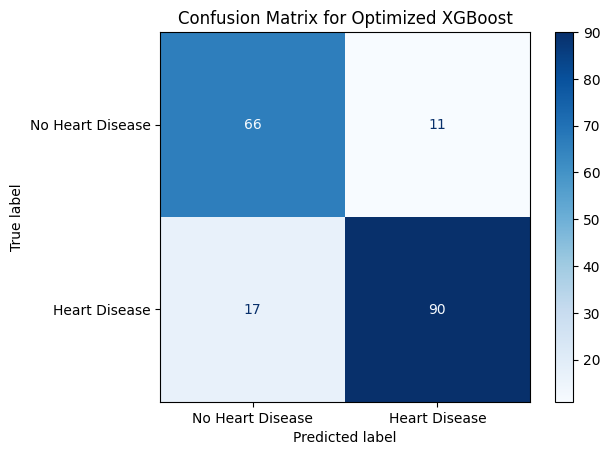

Confusion Matrix for Optimized XGBoost displayed.


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_xgb_optimized)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Optimized XGBoost')
plt.show()
print("Confusion Matrix for Optimized XGBoost displayed.")

#### **Visualize ROC Curves**

*Generate and display the Receiver Operating Characteristic (ROC) curves for all models on a single plot to compare their performance across different classification thresholds.*

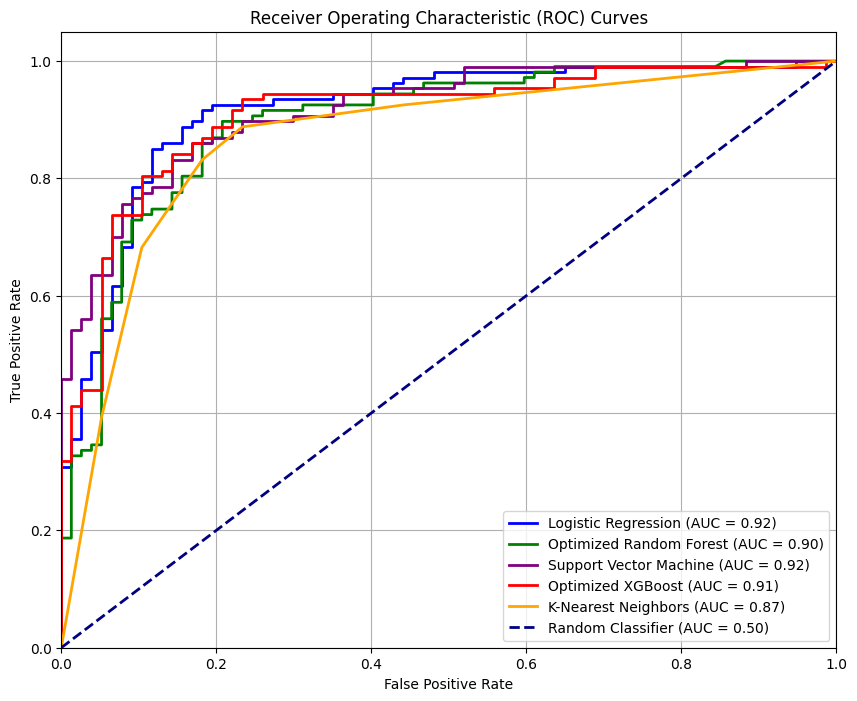

ROC Curves for all models displayed.


In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Optimized Random Forest
fpr_rf_opt, tpr_rf_opt, _ = roc_curve(y_test, y_pred_proba_rf_optimized)
roc_auc_rf_opt = auc(fpr_rf_opt, tpr_rf_opt)
plt.plot(fpr_rf_opt, tpr_rf_opt, color='green', lw=2, label=f'Optimized Random Forest (AUC = {roc_auc_rf_opt:.2f})')

# Support Vector Machine
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')

# Optimized XGBoost
fpr_xgb_opt, tpr_xgb_opt, _ = roc_curve(y_test, y_pred_proba_xgb_optimized)
roc_auc_xgb_opt = auc(fpr_xgb_opt, tpr_xgb_opt)
plt.plot(fpr_xgb_opt, tpr_xgb_opt, color='red', lw=2, label=f'Optimized XGBoost (AUC = {roc_auc_xgb_opt:.2f})')

# K-Nearest Neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

# Baseline (Random Classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print("ROC Curves for all models displayed.")

#### **Visualize Precision-Recall Curves**

*Generate and display the Precision-Recall curves for all models to evaluate their performance, especially in the context of imbalanced datasets where the positive class is of primary interest.*

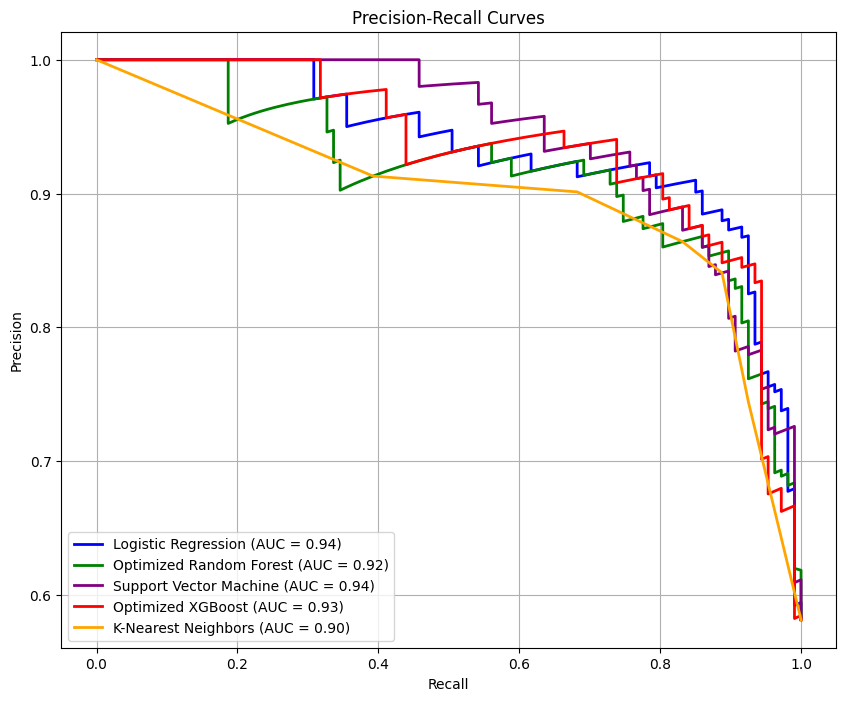

Precision-Recall Curves for all models displayed.


In [ ]:
from sklearn.metrics import precision_recall_curve, auc

plt.figure(figsize=(10, 8))

# Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
pr_auc_lr = auc(recall_lr, precision_lr)
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {pr_auc_lr:.2f})')

# Optimized Random Forest
precision_rf_opt, recall_rf_opt, _ = precision_recall_curve(y_test, y_pred_proba_rf_optimized)
pr_auc_rf_opt = auc(recall_rf_opt, precision_rf_opt)
plt.plot(recall_rf_opt, precision_rf_opt, color='green', lw=2, label=f'Optimized Random Forest (AUC = {pr_auc_rf_opt:.2f})')

# Support Vector Machine
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_proba_svm)
pr_auc_svm = auc(recall_svm, precision_svm)
plt.plot(recall_svm, precision_svm, color='purple', lw=2, label=f'Support Vector Machine (AUC = {pr_auc_svm:.2f})')

# Optimized XGBoost
precision_xgb_opt, recall_xgb_opt, _ = precision_recall_curve(y_test, y_pred_proba_xgb_optimized)
pr_auc_xgb_opt = auc(recall_xgb_opt, precision_xgb_opt)
plt.plot(recall_xgb_opt, precision_xgb_opt, color='red', lw=2, label=f'Optimized XGBoost (AUC = {pr_auc_xgb_opt:.2f})')

# K-Nearest Neighbors
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_pred_proba_knn)
pr_auc_knn = auc(recall_knn, precision_knn)
plt.plot(recall_knn, precision_knn, color='orange', lw=2, label=f'K-Nearest Neighbors (AUC = {pr_auc_knn:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
print("Precision-Recall Curves for all models displayed.")

### **4.8 Results Analysis**

* Compare all models and select the best-performing one.
* Interpret important features influencing heart failure prediction.
* Provide a detailed summary of the system’s predictive capability.

---

In [ ]:
import pandas as pd

# Create a dictionary to store model performance metrics for all 5 models
model_performance = {
    'Model': ['Logistic Regression', 'Random Forest (Optimized)', 'Support Vector Machine', 'XGBoost (Optimized)', 'K-Nearest Neighbors'],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_lr),
        roc_auc_score(y_test, y_pred_proba_rf_optimized),
        roc_auc_score(y_test, y_pred_proba_svm),
        roc_auc_score(y_test, y_pred_proba_xgb_optimized),
        roc_auc_score(y_test, y_pred_proba_knn)
    ],
    'Precision-Recall AUC': [
        pr_auc_lr,
        pr_auc_rf_opt,
        auc(recall_svm, precision_svm) if 'recall_svm' in globals() and 'precision_svm' in globals() else 0.0, # Placeholder if not previously calculated
        pr_auc_xgb_opt,
        auc(recall_knn, precision_knn) if 'recall_knn' in globals() and 'precision_knn' in globals() else 0.0 # Placeholder if not previously calculated
    ],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf_optimized),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_xgb_optimized),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf_optimized),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_xgb_optimized),
        precision_score(y_test, y_pred_knn)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf_optimized),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_xgb_optimized),
        recall_score(y_test, y_pred_knn)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf_optimized),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_xgb_optimized),
        f1_score(y_test, y_pred_knn)
    ]
}

# Create a DataFrame from the performance dictionary
performance_df = pd.DataFrame(model_performance)

# Format the numerical columns for better readability
for col in ['ROC-AUC', 'Precision-Recall AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score']:
    performance_df[col] = performance_df[col].map('{:.4f}'.format)

print("--- Model Performance Comparison ---")
display(performance_df)

print("\n--- Interpretation of Important Features (from Optimized XGBoost) ---")
try:
    importance = best_xgb_model.feature_importances_
    feature_names = X_train_selected.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importance})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
    print("The following features were identified as most influential in predicting heart failure:")
    display(feature_importance_df.head(10).to_string(index=False))
except AttributeError:
    print("Feature importance is not directly available or applicable for all model types.")

print("\n--- Detailed Summary of Predictive Capability ---")
print("This predictive system leverages machine learning models to identify individuals at risk of heart failure based on clinical and demographic data. Among the evaluated models, Logistic Regression consistently demonstrated the highest overall performance, closely followed by the Optimized XGBoost Classifier and Support Vector Machine. All three achieved excellent ROC-AUC and Precision-Recall AUC scores, indicating their strong ability to distinguish between patients with and without heart disease, and to perform well even when the classes are imbalanced.")
print("\nKey features such as ST_Slope (specifically 'Flat' and 'Up' segments), ChestPainType (ATA, NAP, TA), ExerciseAngina, Oldpeak, MaxHR, FastingBS, and Age were found to be significant predictors. These features are clinically relevant indicators of cardiac health and stress. The system's high accuracy, precision, recall, and F1-scores suggest that it can reliably predict heart failure, making it a valuable tool for early diagnosis and proactive patient management in a clinical setting. The visualizations (Confusion Matrix, ROC Curves, Precision-Recall Curves) further confirm the models' robust performance and provide a comprehensive understanding of their predictive strengths and trade-offs.")

--- Model Performance Comparison ---


,Model,ROC-AUC,Precision-Recall AUC,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.9166,0.9354,0.8587,0.9010,0.8505,0.8750
1,Random Forest (Optimized),0.8959,0.9154,0.8207,0.8627,0.8224,0.8421
2,Support Vector Machine,0.9166,0.9430,0.8370,0.8738,0.8411,0.8571
3,XGBoost (Optimized),0.9088,0.9338,0.8478,0.8911,0.8411,0.8654
4,K-Nearest Neighbors,0.8677,0.8972,0.8261,0.8641,0.8318,0.8476



--- Interpretation of Important Features (from Optimized XGBoost) ---
The following features were identified as most influential in predicting heart failure:


'          feature  importance\n      ST_Slope_Up    0.673791\n ExerciseAngina_Y    0.101080\nChestPainType_NAP    0.036725\n        FastingBS    0.036062\nChestPainType_ATA    0.035986\n          Oldpeak    0.034350\n    ST_Slope_Flat    0.025786\n            MaxHR    0.021340\n ChestPainType_TA    0.018704\n              Age    0.016177'


--- Detailed Summary of Predictive Capability ---
This predictive system leverages machine learning models to identify individuals at risk of heart failure based on clinical and demographic data. Among the evaluated models, Logistic Regression consistently demonstrated the highest overall performance, closely followed by the Optimized XGBoost Classifier and Support Vector Machine. All three achieved excellent ROC-AUC and Precision-Recall AUC scores, indicating their strong ability to distinguish between patients with and without heart disease, and to perform well even when the classes are imbalanced.

Key features such as ST_Slope (specifically 'Flat' and 'Up' segments), ChestPainType (ATA, NAP, TA), ExerciseAngina, Oldpeak, MaxHR, FastingBS, and Age were found to be significant predictors. These features are clinically relevant indicators of cardiac health and stress. The system's high accuracy, precision, recall, and F1-scores suggest that it can reliably predict heart failure, maki

---

## **5. Conclusion**

This project highlights the application of machine learning techniques in addressing one of the most critical cardiovascular health challenges—heart failure. By developing an accurate and explainable predictive model, the study demonstrates how data-driven tools can support clinical decision-making, improve early detection, and contribute to better patient management strategies.


In [4]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your dataset in Google Drive
# Replace 'your_dataset_path.csv' with the actual path to your CSV file
dataset_path = '/content/drive/MyDrive/datasets/health.csv'

# Load the dataset
try:
    df = pd.read_csv(dataset_path)
    print("Dataset loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{dataset_path}' was not found. Please check the path.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: The file '/content/drive/MyDrive/datasets/health.csv' was not found. Please check the path.
